In [61]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
train=pd.read_csv('/content/drive/MyDrive/fodseval/train.csv')
test=pd.read_csv('/content/drive/MyDrive/fodseval/test.csv')
submission=pd.read_csv('/content/drive/MyDrive/fodseval/Submission.csv')

In [63]:
test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,192751,16/04/13,9845,300021,109.7250,109.7250,0,0
1,94214,20/02/12,9532,300021,86.2125,86.2125,0,1
2,201221,28/05/13,8094,217217,229.4250,229.4250,0,0
3,38612,27/06/11,9490,223245,210.9000,213.0375,0,1
4,83833,9/1/2012,9043,219029,327.0375,327.0375,0,0


In [64]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,9,17/01/11,8091,219009,227.2875,227.2875,0,0,18


In [65]:
submission.head()

,record_ID,units_sold
0,192751,0
1,94214,0
2,201221,0
3,38612,0
4,83833,0


In [66]:
print(test.shape)
print(train.shape)

(30000, 8)
(120150, 9)


In [67]:
train.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,120150.000000,120150.000000,120150.000000,120150.000000,120150.000000,120150.000000,120150.000000,120150.000000
mean,106356.242072,9200.680108,254646.000574,206.620108,219.395313,0.095098,0.133267,51.679534
std,61430.743017,615.091588,85304.080816,103.306218,110.927286,0.293351,0.339864,60.718735
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53140.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106366.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159709.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [68]:
train.dtypes

record_ID            int64
week                object
store_id             int64
sku_id               int64
total_price        float64
base_price         float64
is_featured_sku      int64
is_display_sku       int64
units_sold           int64
dtype: object

In [69]:
train.dtypes.value_counts()

int64      6
float64    2
object     1
dtype: int64

In [70]:
train.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [71]:
test.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
dtype: int64

In [72]:
print(train.isna().sum().sum())
print(test.isna().sum().sum())

0
1


In [74]:
test['total_price'] = test['total_price'].fillna(test['total_price'].mean())

In [75]:
test.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
dtype: int64

In [76]:
train.columns

Index(['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price',
       'is_featured_sku', 'is_display_sku', 'units_sold'],
      dtype='object')

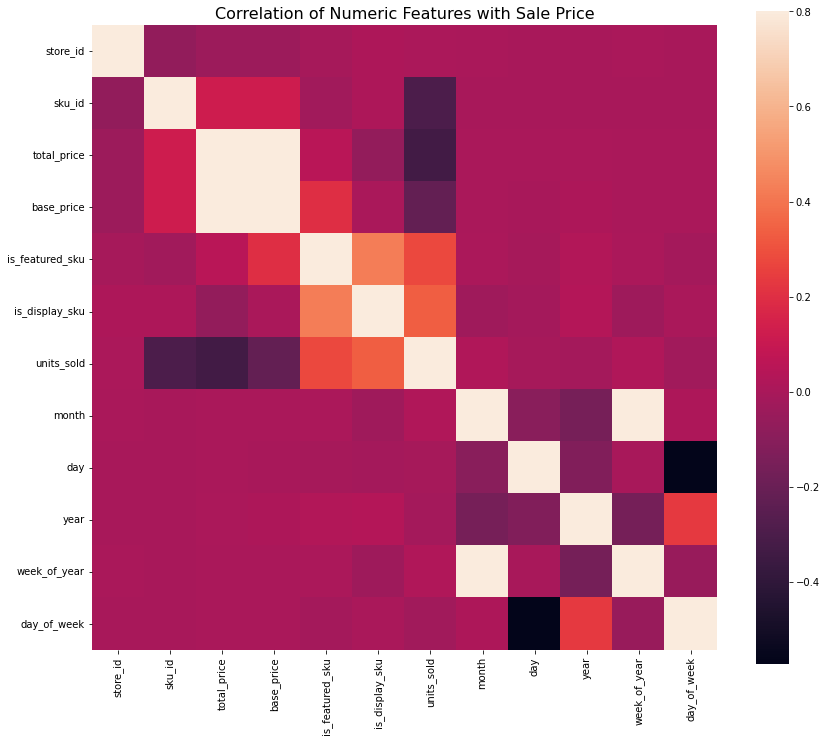

In [102]:
plt.figure(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price', y=1, size=16)
sns.heatmap(train.corr(), square = True, vmax=0.8)

In [77]:
train['week'] = train['week'].astype('datetime64')

In [78]:
train['store_id'] = train['store_id'].astype('category')
train['sku_id'] = train['sku_id'].astype('category')
train['is_featured_sku'] = train['is_featured_sku'].astype('category')
train['is_display_sku'] = train['is_display_sku'].astype('category')

In [79]:
train['month'] = [date.month for date in train.week] 
train['day'] = [date.day for date in train.week]
train['year'] = [date.year for date in train.week]  
train['week_of_year'] = [date.weekofyear for date in train.week] 
train['day_of_week'] = [date.dayofweek for date in train.week]

In [80]:
train = train.drop(['week'] ,axis = 1)

In [81]:
train = train.drop(['record_ID'] ,axis = 1)

In [82]:
train.dtypes

store_id           category
sku_id             category
total_price         float64
base_price          float64
is_featured_sku    category
is_display_sku     category
units_sold            int64
month                 int64
day                   int64
year                  int64
week_of_year          int64
day_of_week           int64
dtype: object

In [83]:
test['week'] = test['week'].astype('datetime64')

In [84]:
test['month'] = [date.month for date in test.week] 
test['day'] = [date.day for date in test.week]
test['year'] = [date.year for date in test.week]  
test['week_of_year'] = [date.weekofyear for date in test.week] 
test['day_of_week'] = [date.dayofweek for date in test.week] 

In [85]:
test = test.drop(['week'] ,axis = 1)

In [86]:
test = test.drop(['record_ID'] ,axis = 1)

In [87]:
numerical = train.select_dtypes(include = ['int64','float64'])

In [88]:
for i in numerical.columns:
    print(f'range of {i}:[{train[i].min()}, {train[i].max()}]')

range of total_price:[41.325, 562.1625]
range of base_price:[61.275, 562.1625]
range of units_sold:[1, 2876]
range of month:[1, 12]
range of day:[1, 31]
range of year:[2011, 2013]
range of week_of_year:[1, 52]
range of day_of_week:[0, 6]


In [89]:
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error as MSLE

In [90]:
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)))

In [91]:
def UVA_boxplot(data, var_group, include_outlier = True):
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  from scipy import stats
  for j,i in enumerate(var_group):
   
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    skew = data[i].skew()
    mini = data[i].min()
    maxi = data[i].max()
    kurt = data[i].kurtosis()
    shapiro_test = stats.shapiro(data[i])
    
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])
    
    plt.subplot(1,size,j+1)
    sns.boxplot(data[i], orient="v")
    plt.ylabel('{}'.format(i))
    plt.title('Skew = {}; Range = {} \n 1st, 2nd, 3rd  quartile = {};\n Whiskers = {}; kurtosis = {} ; \n Number of Outlier (low/high) = {} '.format(
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2)),
                                                                                                   (round(quant25,2),round(med,2),round(quant75,2)),
                                                                                                   (round(whis_low,2), round(whis_high,2)), 
                                                                                                   (round(kurt,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

In [92]:
def UVA_category(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (8*size,6), dpi = 100)
    
  for j,i in enumerate(var_group):
    norm_count = round(data[i].value_counts(normalize = True)*100,2)
    n_uni = data[i].nunique()
    sns.set_style('darkgrid')
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
    plt.tight_layout()

In [93]:
train['store_id'] = train['store_id'].astype('int64')
train['sku_id'] = train['sku_id'].astype('int64')
train['is_display_sku'] = train['is_display_sku'].astype('int64')
train['is_featured_sku'] = train['is_featured_sku'].astype('int64')

In [95]:
train['units_sold'] = np.log1p(train['units_sold'])
train['base_price'] = np.log(train['base_price'])

In [96]:
x = train.drop(columns = ['units_sold'], axis=1)
y = train['units_sold']
x.shape , y.shape

((120150, 11), (120150,))

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [98]:
model = LR()
model.fit(x_train,y_train)

pred = model.predict(x_train)
train_rmsle = np.sqrt(MSLE(y_train,pred))
pred_1= model.predict(x_test)
test_rmsle = np.sqrt(MSLE(y_test,pred_1))
print('TRAIN RMSLE VALUE',train_rmsle)
print('TEST RMSLE VALUE',test_rmsle)

TRAIN RMSLE VALUE 0.1681296883908727
TEST RMSLE VALUE 0.16446088617539587


In [99]:
prediction = model.predict(test)
prediction

array([ 73.43223975,  58.53061745, 152.86921841, ..., 141.55336646,
       118.05301559, 148.62670801])

In [100]:
test['predicted_sales_value'] = prediction

In [101]:
test.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,day,year,week_of_year,day_of_week,predicted_sales_value
0,9845,300021,109.7250,109.7250,0,0,4,16,2013,16,1,73.432240
1,9532,300021,86.2125,86.2125,0,1,2,20,2012,8,0,58.530617
2,8094,217217,229.4250,229.4250,0,0,5,28,2013,22,1,152.869218
3,9490,223245,210.9000,213.0375,0,1,6,27,2011,26,0,142.659943
4,9043,219029,327.0375,327.0375,0,0,9,1,2012,35,5,217.460473
